In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.getcwd())
cwd = os.getcwd()
# Any results you write to the current directory are saved as output.

C:\Users\Administrator\Documents\Deep_learning\leb_project


In [2]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Softmax,Input,Flatten
from keras.optimizers import Adam,RMSprop,SGD
from keras.layers.merge import add
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import BatchNormalization

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score
from keras.metrics import categorical_accuracy
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator

In [5]:
from tensorflow import set_random_seed
os.environ['PYTHONHASHSEED'] = "0"
np.random.seed(1)
set_random_seed(2)

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4879648024625938754
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1523639910
locality {
  bus_id: 1
}
incarnation: 12396329270807074523
physical_device_desc: "device: 0, name: GeForce GTX 760, pci bus id: 0000:01:00.0, compute capability: 3.0"
]


In [7]:
import keras.backend.tensorflow_backend as K

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same",
                 input_shape=(64,64,1)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))
model.add(Dense(2, activation="softmax"))

In [9]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
gen = ImageDataGenerator()
train_batches = gen.flow_from_directory(cwd + "/chest_xray/train",model.input_shape[1:3],color_mode="grayscale",shuffle=True,seed=1,
                                        batch_size=16)
valid_batches = gen.flow_from_directory(cwd + "/chest_xray/val", model.input_shape[1:3],color_mode="grayscale", shuffle=True,seed=1,
                                        batch_size=16)
test_batches = gen.flow_from_directory(cwd + "/chest_xray/test", model.input_shape[1:3], shuffle=False,
                                       color_mode="grayscale", batch_size=8)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
with K.tf.device('/gpu:0'):
    model.fit_generator(train_batches,validation_data=valid_batches,epochs=3)

Epoch 1/3
326/326 [==============================] - 50s 152ms/step - loss: 0.2994 - acc: 0.9080 - val_loss: 6.7607 - val_acc: 0.5000
Epoch 2/3
326/326 [==============================] - 48s 147ms/step - loss: 0.1517 - acc: 0.9450 - val_loss: 5.5757 - val_acc: 0.5625
Epoch 3/3
326/326 [==============================] - 48s 147ms/step - loss: 0.1342 - acc: 0.9544 - val_loss: 4.4467 - val_acc: 0.5000


In [14]:
with K.tf.device('/gpu:0'):
    model.compile(Adam(lr=0.0001),loss="categorical_crossentropy", metrics=["accuracy"])
    model.fit_generator(train_batches,validation_data=valid_batches,epochs=200)

Epoch 1/200
326/326 [==============================] - 49s 149ms/step - loss: 0.0694 - acc: 0.9722 - val_loss: 1.3681 - val_acc: 0.6250
Epoch 2/200
326/326 [==============================] - 47s 145ms/step - loss: 0.0524 - acc: 0.9810 - val_loss: 0.0526 - val_acc: 1.0000
Epoch 3/200
326/326 [==============================] - 47s 146ms/step - loss: 0.0505 - acc: 0.9806 - val_loss: 1.0031 - val_acc: 0.5625
Epoch 4/200
326/326 [==============================] - 48s 146ms/step - loss: 0.0510 - acc: 0.9816 - val_loss: 0.8431 - val_acc: 0.6250
Epoch 5/200
326/326 [==============================] - 47s 145ms/step - loss: 0.0440 - acc: 0.9852 - val_loss: 0.1560 - val_acc: 0.9375
Epoch 6/200
326/326 [==============================] - 47s 146ms/step - loss: 0.0400 - acc: 0.9835 - val_loss: 0.9677 - val_acc: 0.6250
Epoch 7/200
326/326 [==============================] - 47s 145ms/step - loss: 0.0413 - acc: 0.9850 - val_loss: 0.5156 - val_acc: 0.6875
Epoch 8/200
326/326 [===========================

Epoch 61/200
326/326 [==============================] - 47s 144ms/step - loss: 0.0082 - acc: 0.9973 - val_loss: 2.4050 - val_acc: 0.7500
Epoch 62/200
326/326 [==============================] - 47s 144ms/step - loss: 0.0084 - acc: 0.9975 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 63/200
326/326 [==============================] - 47s 144ms/step - loss: 0.0102 - acc: 0.9964 - val_loss: 0.8824 - val_acc: 0.7500
Epoch 64/200
326/326 [==============================] - 47s 143ms/step - loss: 0.0049 - acc: 0.9987 - val_loss: 0.4194 - val_acc: 0.7500
Epoch 65/200
326/326 [==============================] - 47s 144ms/step - loss: 0.0075 - acc: 0.9965 - val_loss: 0.3901 - val_acc: 0.8125
Epoch 66/200
326/326 [==============================] - 47s 143ms/step - loss: 0.0092 - acc: 0.9967 - val_loss: 0.0279 - val_acc: 1.0000
Epoch 67/200
326/326 [==============================] - 47s 143ms/step - loss: 0.0066 - acc: 0.9981 - val_loss: 1.1568 - val_acc: 0.7500
Epoch 68/200
326/326 [===================

326/326 [==============================] - 51s 155ms/step - loss: 0.0059 - acc: 0.9987 - val_loss: 0.0157 - val_acc: 1.0000
Epoch 180/200
326/326 [==============================] - 50s 153ms/step - loss: 0.0017 - acc: 0.9992 - val_loss: 0.6016 - val_acc: 0.8125
Epoch 181/200
326/326 [==============================] - 48s 148ms/step - loss: 0.0020 - acc: 0.9994 - val_loss: 1.6947 - val_acc: 0.6875
Epoch 182/200
326/326 [==============================] - 49s 151ms/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.8950 - val_acc: 0.8125
Epoch 183/200
326/326 [==============================] - 48s 148ms/step - loss: 0.0058 - acc: 0.9979 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 184/200
326/326 [==============================] - 50s 152ms/step - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0840 - val_acc: 1.0000
Epoch 185/200
326/326 [==============================] - 51s 155ms/step - loss: 0.0038 - acc: 0.9987 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 186/200
326/326 [=========================

In [15]:
p = model.predict_generator(test_batches, verbose=True)
pre = pd.DataFrame(p)
pre["filename"] = test_batches.filenames
pre["label"] = (pre["filename"].str.contains("PNEUMONIA")).apply(int)
pre['pre'] = (pre[1]>0.5).apply(int)

78/78 [==============================] - 9s 114ms/step


In [16]:
recall_score(pre["label"],pre["pre"])

0.9948717948717949

In [17]:
roc_auc_score(pre["label"],pre[1])

0.8342373438527284

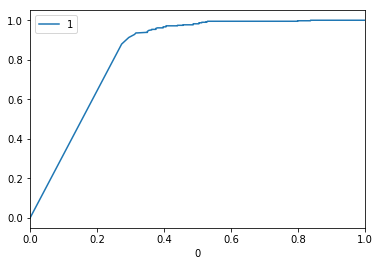

In [18]:
tpr,fpr,thres = roc_curve(pre["label"],pre[1])
roc = pd.DataFrame([tpr,fpr]).T
roc.plot(x=0,y=1)